[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

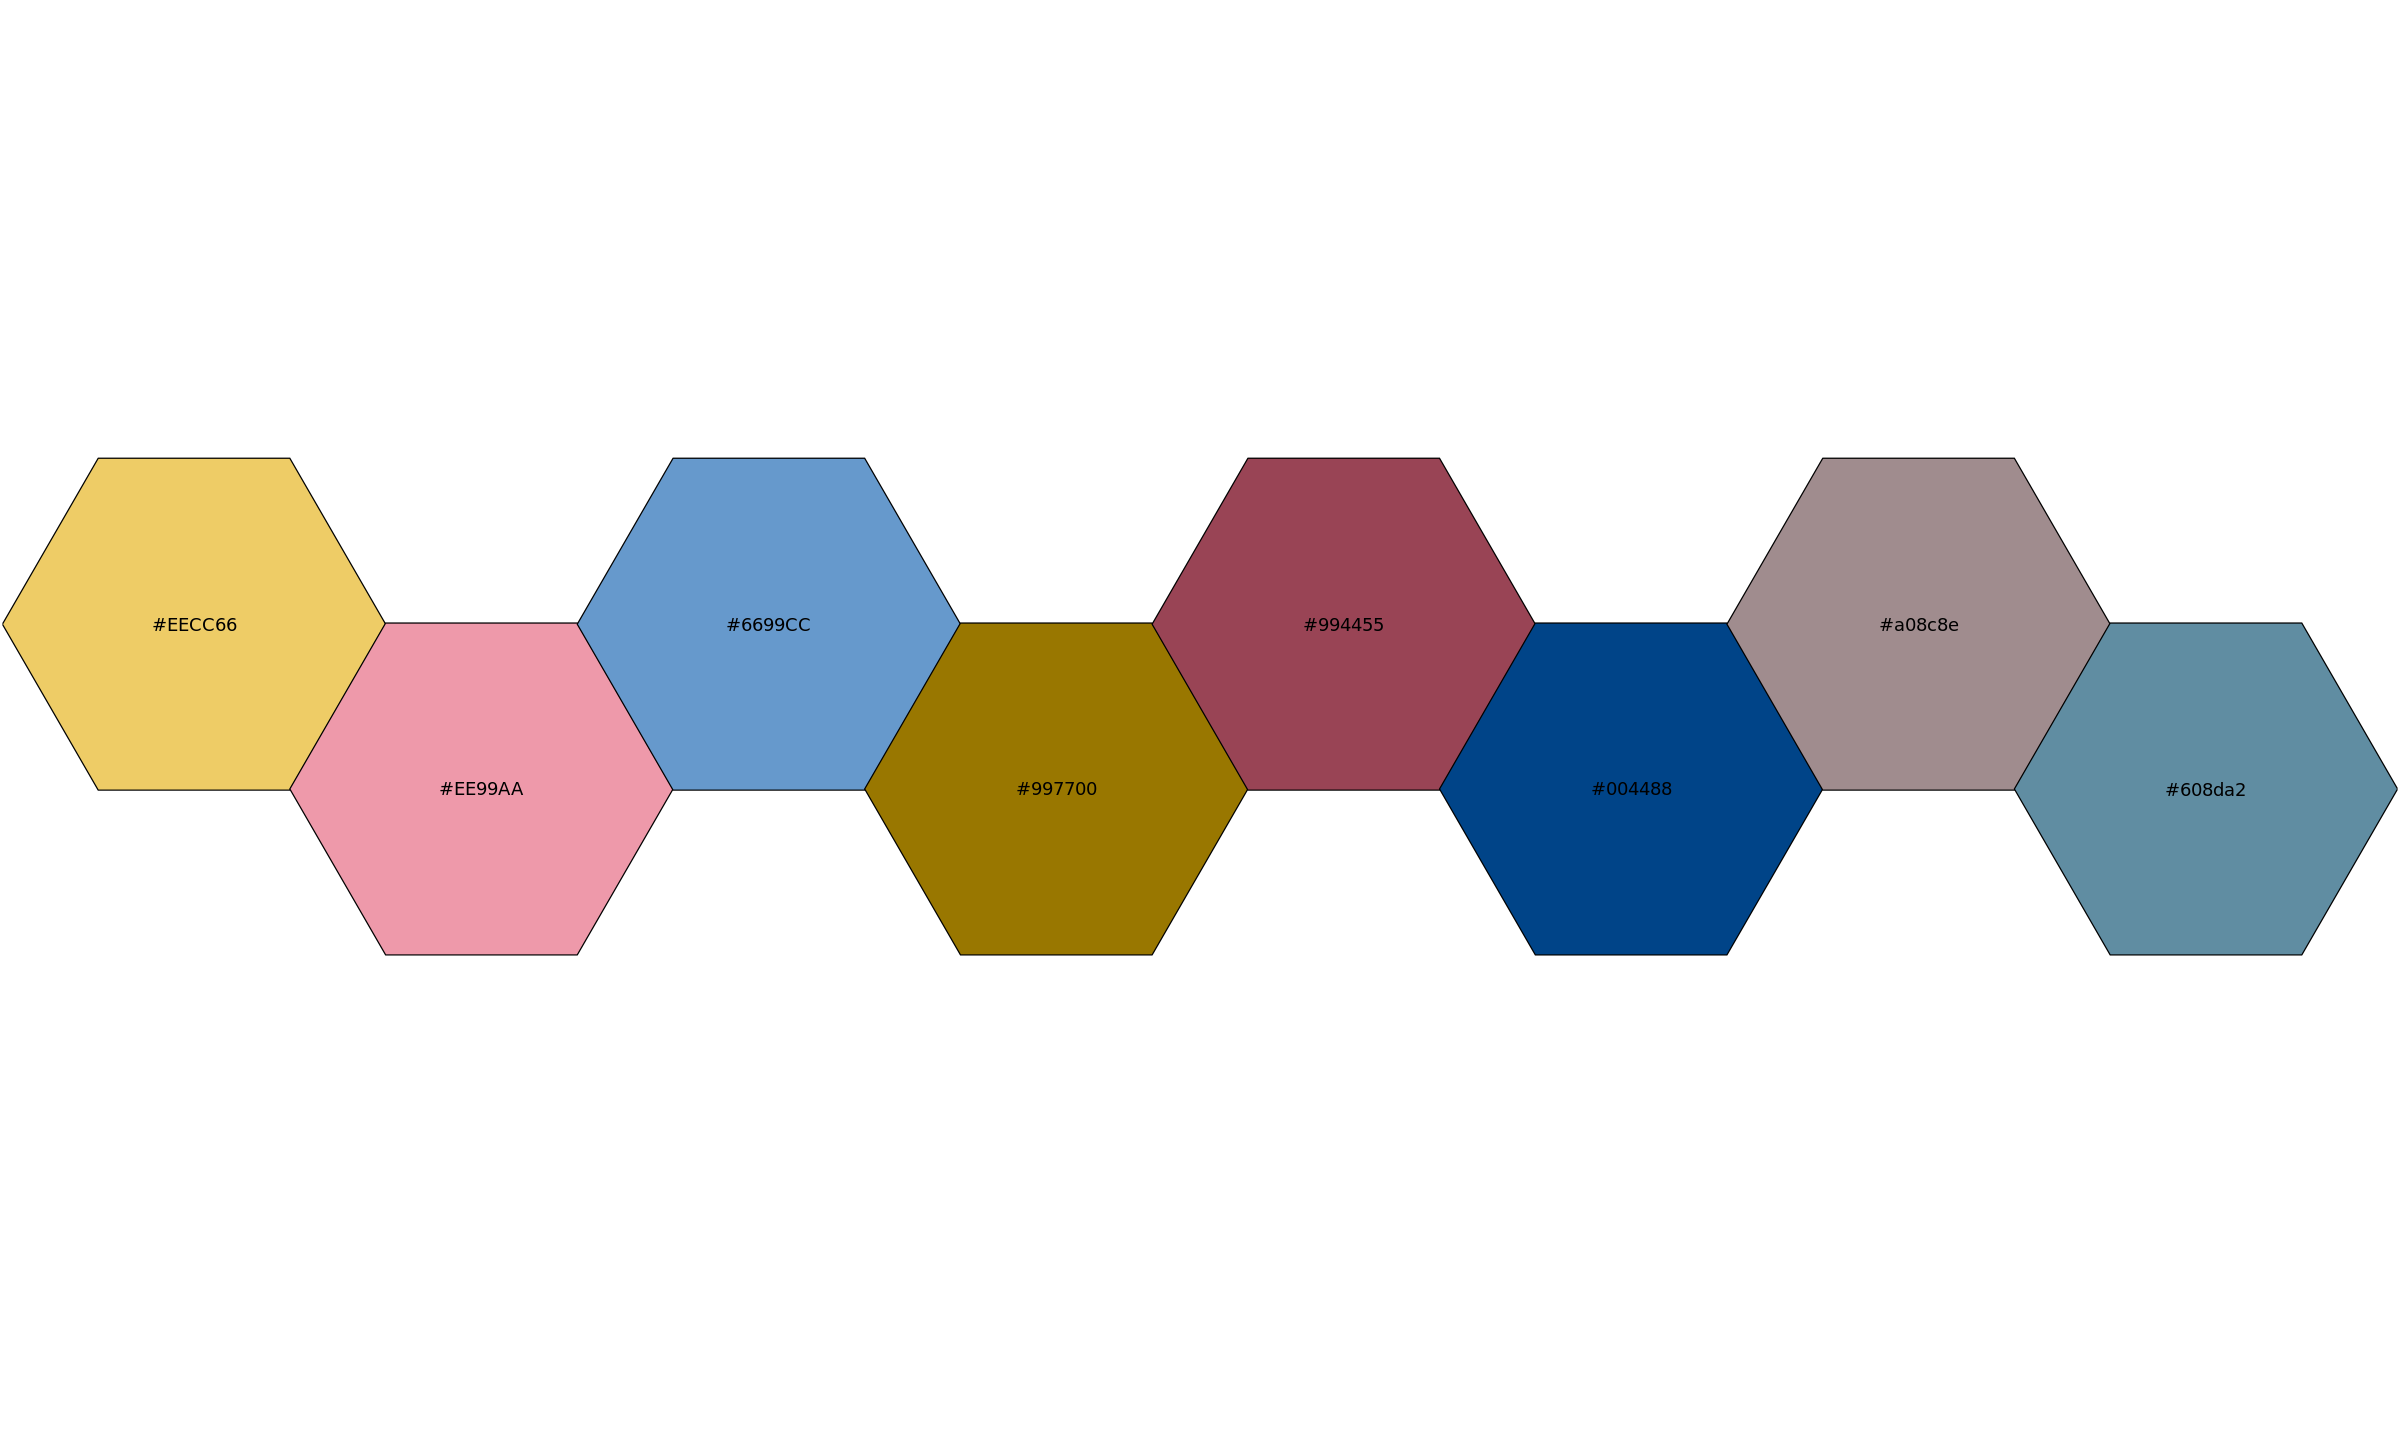

In [17]:
f_func <- "../functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))
f_path <- "../dirs.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_path, '--to=script', '--stdout'), stdout = TRUE)))
f_cols <- "../cols.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_cols, '--to=script', '--stdout'), stdout = TRUE)))

In [18]:
mt_nr_genomes <- readRDS(paste0(INT_database_stats, "mt_nr_genomes.Rdata"))
mt_nr_species <- readRDS(paste0(INT_database_stats, "mt_nr_species.Rdata"))
mt_inspect <- readRDS(paste0(INT_database_stats, "mt_inspect.Rdata"))

In [19]:
nr_kmers <- melt(mt_inspect, value.name = "nr_kmers", varnames = c("db", "type")) %>% 
    filter(db %in% dbs) %>% 
    mutate(db = gsub(db, pattern = "RS_minusT2T", replacement = "RS w/o CHM13v2")) %>% 
    mutate(db = factor(db, levels = dbs_mut)) %>%     
    filter(type %in% c("Fungi", "Archaea", "Bacteria", "Viruses", "Homo sapiens")) %>% 
    mutate(type = factor(type, levels = c("Fungi", "Archaea", "Bacteria", "Viruses", "Homo sapiens")))  %>% 
    mutate(split = ifelse(type == "Homo sapiens", 0,1)) %>% 
    ggplot(aes(x = db, y = nr_kmers, fill = type)) + 
        geom_col() +
        facet_grid(vars(split), scales = "free_y") +
        labs(x = "", y = "\n\n#k-mers", fill = "taxa", title = "Database Complexity") +
        scale_fill_grey(start = .4, end = .9) + 
        theme_bw() + theme(legend.position='right', legend.justification='right', legend.direction = 'vertical',
                          #axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
                          strip.background = element_blank(), strip.text.y = element_blank(), 
                          axis.title.y = element_text(size = 15)) + labs(tag = 'e') + 
        scale_x_discrete(labels=c(
            "RS w/o CHM13v2" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
            "EPRSc2" = "cRE.21", "EPRSFv46" = "uRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
            "EPRSFv64" = "uRE.31", "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) 

In [20]:
nr_genomes_Asp <- mt_nr_genomes %>% melt(varnames = c("db", "origin"), value.name = "nr_genomes") %>% 
    filter(db %in% dbs) %>% 
    mutate(db = gsub(db, pattern = "RS_minusT2T", replacement = "RS w/o CHM13v2")) %>% 
    mutate(db = factor(db, levels = dbs_mut))  %>%    
    mutate(status = ifelse(grepl(db, pattern = "DM"), "dustmasked", 
                    ifelse(grepl(db, pattern = "EPRSc2$"), "clean", "unaltered"))) %>%  
    mutate(origin_new = origin) %>% 
    mutate(origin_new = ifelse(origin == "FungiDB" & grepl(db, pattern = "EPRSFv64"), 
                               yes = "FungiDB v64", no = as.character(origin_new))) %>% 
    mutate(origin_new = ifelse(origin == "FungiDB" & !grepl(db, pattern = "EPRSFv64"), 
                               yes = "FungiDB v46", no = as.character(origin_new))) %>%
    mutate(origin_new = factor(origin_new, levels = c("NCBI", "FungiDB v46", "FungiDB v64", "MycoCosm"))) %>% 
    #ifelse(origin = ifelse(which(origin == "FungiDB" & !grepl(db, patttern = 46)), yes = paste(FungiDB, 46), no = origin)) %>% print()
    ggplot(aes(x = db, y = nr_genomes, fill = origin_new)) + 
        scale_pattern_manual(values = c(unaltered = "none", dustmasked = "stripe", clean = "crosshatch")) +
        geom_bar_pattern(position="stack",
                         stat="identity", 
                         mapping=aes(pattern=status), 
                         pattern_colour = 'white',
                         pattern_fill = "white",
                         pattern_frequency = 50, 
                         pattern_angle = 45) +
        scale_fill_manual(values = alpha(c(colors_mc[c(4:6)], "darkgrey"), alpha = 1)) + 
        theme_bw() + 
        theme(legend.position='top', legend.justification='right', legend.direction = 'vertical',
             legend.key = element_rect(fill = "white"),
             #axis.text.x = element_blank(), 
             axis.title.x = element_blank(),
             axis.title.y = element_text(size = 15),
             #axis.ticks.x = element_blank()
             ) +
        labs(x = "", y = "\n\n#genomes", tag = 'a', fill = "origin") + 
        geom_text(aes(db, sum_genomes, label = sum_genomes, fill = NULL), 
                  data = . %>% group_by(db) %>% summarise(sum_genomes = sum(nr_genomes)), nudge_y = 20) + 
        ylim(0,360) + ggtitle("Genomic sequences Aspergillus ") + 
        labs(pattern = "processing") +
        scale_x_discrete(labels=c(
            "RS w/o CHM13v2" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
            "EPRSc2" = "cRE.21", "EPRSFv46" = "uRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
            "EPRSFv64" = "uRE.31", "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) 

In [21]:
nr_kmers_Asp <- melt(mt_inspect, value.name = "nr_kmers", varnames = c("db", "type")) %>% 
    filter(type == "Aspergillus")  %>% 
    filter(db %in% dbs) %>% 
    mutate(db = gsub(db, pattern = "RS_minusT2T", replacement = "RS w/o CHM13v2")) %>% 
    mutate(db = factor(db, levels = dbs_mut))  %>%    
    mutate(status = ifelse(grepl(db, pattern = "DM"), "dustmasked", 
                    ifelse(grepl(db, pattern = "EPRSc2$"), "clean", "unaltered"))) %>% 
    ggplot(aes(x = db, y = nr_kmers, color = db, fill = db)) + 
        scale_fill_manual(values = rep("black", 10)) +
        scale_color_manual(values = rep("dark grey", 10)) +
        scale_pattern_manual(values = c(unaltered = "none", dustmasked = "none", clean = "none")) +
        geom_bar_pattern(position="stack",
                         stat="identity", 
                         mapping=aes(pattern=status), 
                         pattern_fill = "white", 
                         pattern_frequency = 5, pattern_angle = 45) + 
        theme_bw() + 
        theme(#axis.text.x = element_blank(), 
             axis.title.x = element_blank(), 
             axis.title.y = element_text(size = 15),
             #axis.ticks.x = element_blank()
            ) + 
        labs(x = NA, y = "\n\n#k-mers", title = "Database Complexity Aspergillus") + guides(fill="none", pattern = "none") +
        #geom_text(aes(db, nr_kmers, label = nr_kmers, fill = NULL), nudge_y = 10^7.5, col = "black") + 
        guides(fill = FALSE, color = FALSE) + labs(tag = 'd') +
        scale_x_discrete(labels=c(
            "RS w/o CHM13v2" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
            "EPRSc2" = "cRE.21", "EPRSFv46" = "uRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
            "EPRSFv64" = "uRE.31", "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) 

In [22]:
nr_species_Asp <- mt_nr_species  %>% 
    melt(value.name = "nr", varnames = c("db", "type"))  %>% 
    filter(type == "species")  %>% 
    filter(db %in% dbs) %>% 
    mutate(db = gsub(db, pattern = "RS_minusT2T", replacement = "RS w/o CHM13v2")) %>% 
    mutate(db = factor(db, levels = dbs_mut))  %>%    
    mutate(status = ifelse(grepl(db, pattern = "DM"), "dustmasked", 
                    ifelse(grepl(db, pattern = "EPRSc2$"), "clean", "unaltered"))) %>% 
    ggplot(aes(x = db, y = nr, color = db, fill = db)) + 
        scale_fill_manual(values = rep("black", 10)) +
        scale_color_manual(values = rep("dark grey", 10)) +
        scale_pattern_manual(values = c(unaltered = "none", dustmasked = "none", clean = "none")) +
        geom_bar_pattern(position="stack",
                         stat="identity", 
                         mapping=aes(pattern=status), 
                         pattern_fill = "white", 
                         pattern_frequency = 5, pattern_angle = 45) +
        theme_bw() + 
        theme(#axis.text.x = element_blank(), 
             axis.title.x = element_blank(),
             axis.title.y = element_text(size = 15),
             #axis.ticks.x = element_blank()
            ) + 
        labs(x = NA, y = "\n\n#species") + guides(fill="none", pattern = "none") +
        geom_text(aes(db, nr, label = nr, fill = NULL), nudge_y = 20, col = "black") + 
        guides(fill = FALSE, color = FALSE) + labs(tag = 'b') +
        scale_x_discrete(labels=c(
            "RS w/o CHM13v2" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
            "EPRSc2" = "cRE.21", "EPRSFv46" = "uRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
            "EPRSFv64" = "uRE.31", "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) 

In [23]:
nr_subgenera_Asp <- mt_nr_species  %>% 
    melt(value.name = "nr", varnames = c("db", "type"))  %>% 
    filter(type == "subgenera")  %>% 
    filter(db %in% dbs) %>% 
    mutate(db = gsub(db, pattern = "RS_minusT2T", replacement = "RS w/o CHM13v2")) %>% 
    mutate(db = factor(db, levels = dbs_mut))  %>%    
    mutate(status = ifelse(grepl(db, pattern = "DM"), "dustmasked", 
                    ifelse(grepl(db, pattern = "EPRSc2$"), "clean", "unaltered"))) %>% 
    ggplot(aes(x = db, y = nr, color = db, fill = db)) + 
        scale_fill_manual(values = rep("black", 10)) +
        scale_color_manual(values = rep("dark grey", 10)) +
        scale_pattern_manual(values = c(unaltered = "none", dustmasked = "none", clean = "none")) +
        geom_bar_pattern(position="stack",
                         stat="identity", 
                         mapping=aes(pattern=status), 
                         pattern_fill = "white", 
                         pattern_frequency = 5, pattern_angle = 45) +
        theme_bw() + 
        theme(#axis.text.x = element_blank(), 
             axis.title.x = element_blank(), 
             axis.title.y = element_text(size = 15),
             #axis.ticks.x = element_blank()
        ) + 
        labs(x = NA, y = "\n\n#subgenera") + guides(fill="none", pattern = "none") +
        guides(fill = FALSE, color = FALSE) + labs(tag = 'c') + scale_x_discrete(labels=c(
            "RS w/o CHM13v2" = "uR.7 w/o\nCHM13v2", "RS" = "uR.7 ", 
            "EPRSc2" = "cRE.21", "EPRSFv46" = "uRE.21", "EPRSFv46DM" = "dRE.21", "EPRSFv46MCAspDM" = "dREM.258", 
            "EPRSFv64" = "uRE.31", "EPRSFv64DM" = "dRE.31", "EPRSFv64MCAspDM" = "dREM.260")) 

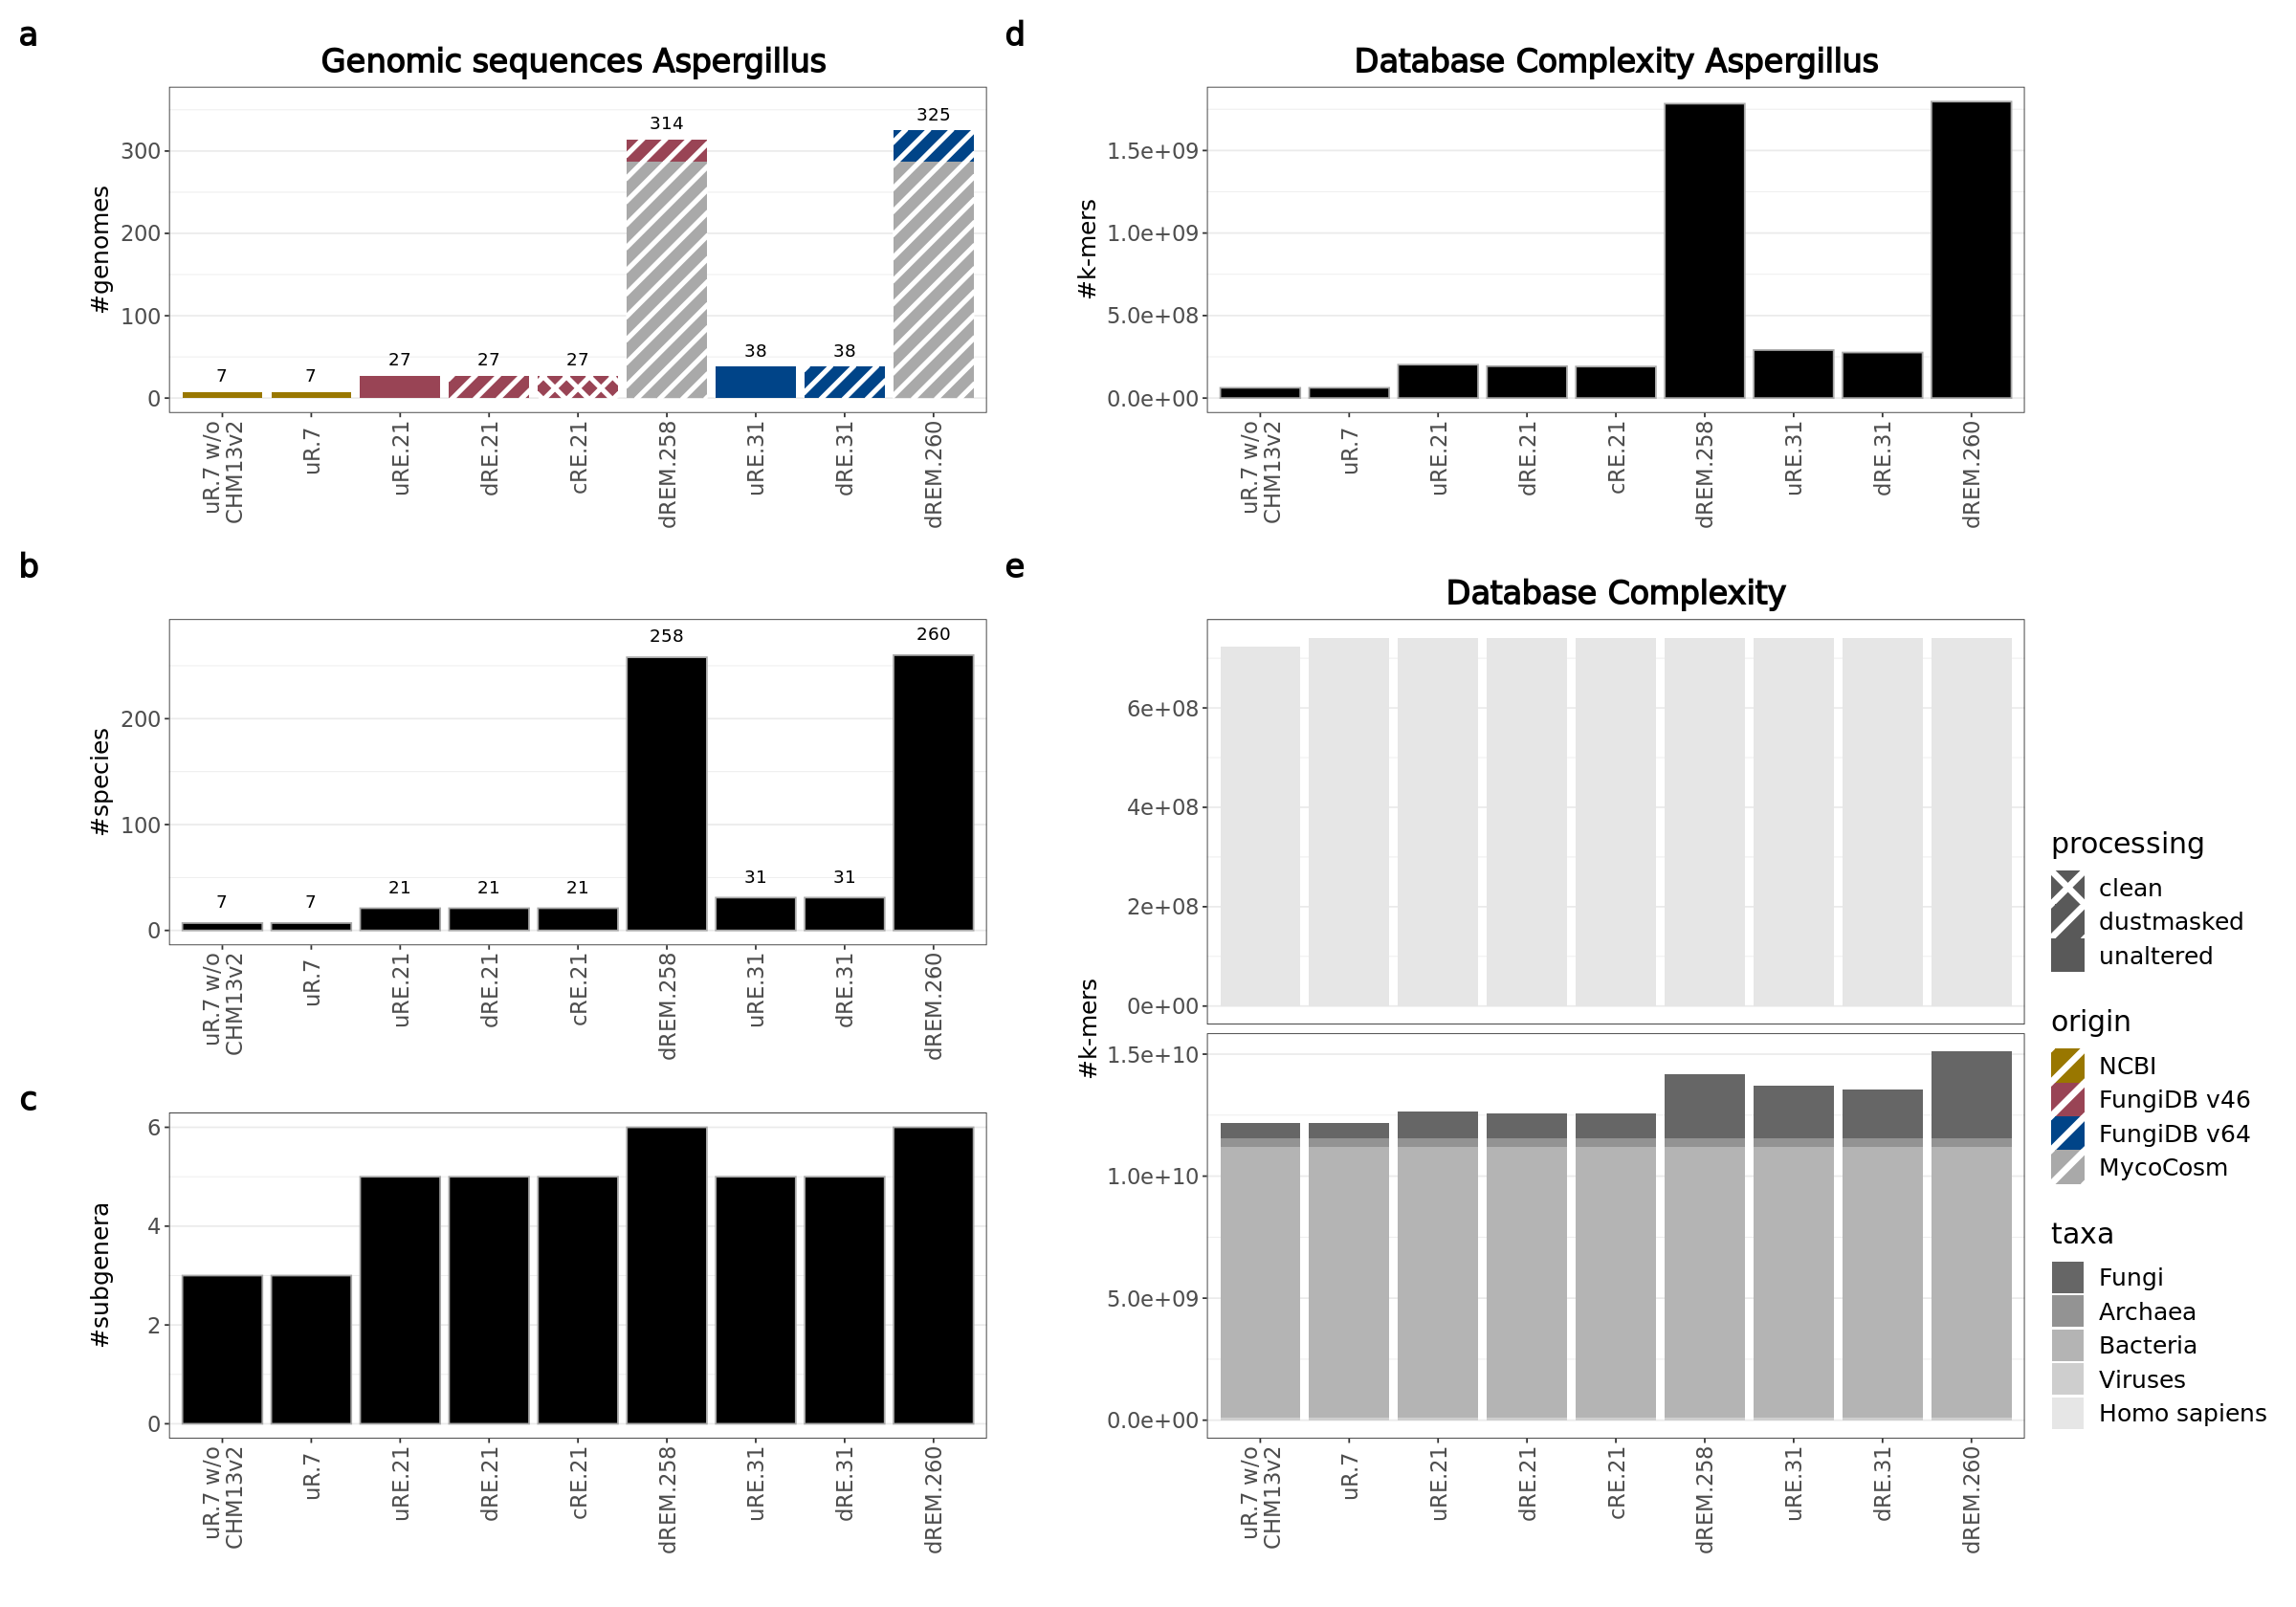

In [28]:
options(repr.plot.width=20, repr.plot.height=14)
layout <- "
    AD
    BE
    CE"

SuplFig2 <- nr_genomes_Asp + nr_species_Asp + nr_subgenera_Asp + nr_kmers_Asp + nr_kmers + 
    plot_layout(design = layout, heights = c(4,4,4), guides = "collect") &
    theme(legend.position='right', legend.justification='bottom', legend.direction = 'vertical',
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
            legend.key.size = unit(0.75, 'cm'), legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.75, 'cm'), 
            text = element_text(size = 17), 
            legend.title = element_text(size = 18), legend.text = element_text(size = 15, colour = "black"),
            plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), 
            plot.subtitle = element_text(size = 17, hjust = 0.5), 
            plot.tag = element_text(face = 'bold', size = 20),
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank())
SuplFig2

ggsave("../../output/suppl_figures/SuplFig2_R.png", 
       SuplFig2, width = 20, height = 14)
ggsave("../../output/suppl_figures/SuplFig2_R.pdf", 
       SuplFig2, width = 20, height = 14)